# Winter School 2025 | Ghana - Germany | Computational Modelling in Marine Ecology, Fisheries, and Climate

**Dates**: January 27 - 31, 2025  
**Location**: Africa Centre of Excellence in Coastal Resilience (ACECoR), University of Cape Coast, Ghana  
**Organizers**: Prof. Agostino Merico (ZMT), Prof. Joseph Aggrey-Fynn (ACECoR and University of Cape Coast, Ghana), Dr. Kwabena A. Owusu (University of Energy & Natural Resources, Sunyani, Ghana)  
**Workshop Language**: English

## About the Winter School
The Winter School offers an opportunity for MSc and PhD students passionate about learning and discussing mathematical modeling techniques applicable to problems in marine ecology, fisheries, and climate. No advanced prior knowledge of mathematics or digital disciplines is required. We encourage diversity, inclusion, and cultural exchange among participating students.

## Program
The winter school will explore several ecological problems using advanced modeling methods, including differential equation-based modeling and agent-based modeling. Both approaches will be applied using the Python programming language.

### Topics covered:
- Population growth
- Predator-prey interactions
- Plankton dynamics
- Fisheries ecology
- Climate and greenhouse effect

An overview of the basics of mathematical modeling and the Python programming language will introduce students to the topics. The winter school promotes cultural exchange among students from different backgrounds and supports ethical and legal values in ocean governance for the sustainable and peaceful use of marine resources.

## Contact
For any inquiries, please contact Prof. Dr. Agostino Merico by email at [agostino.merico@leibniz-zmt.de](mailto:agostino.merico@leibniz-zmt.de).

# Predator-Prey Interactions

To illustrate the Lotka-Volterra predation model with time series in Python, we can use differential equations to model the populations of prey and predators. Here is an example of code that simulates and visualizes the results of prey and predator populations over time.

The Lotka-Volterra differential equations are as follows:

$$
\frac{dx}{dt} = \alpha x - \beta x y \quad \text{(prey growth rate)}
$$

$$
\frac{dy}{dt} = \delta x y - \gamma y \quad \text{(predator growth rate)}
$$

Where:

- \( x \) is the prey population,
- \( y \) is the predator population,
- \( \alpha \), \( \beta \), \( \gamma \), and \( \delta \) are parameters.


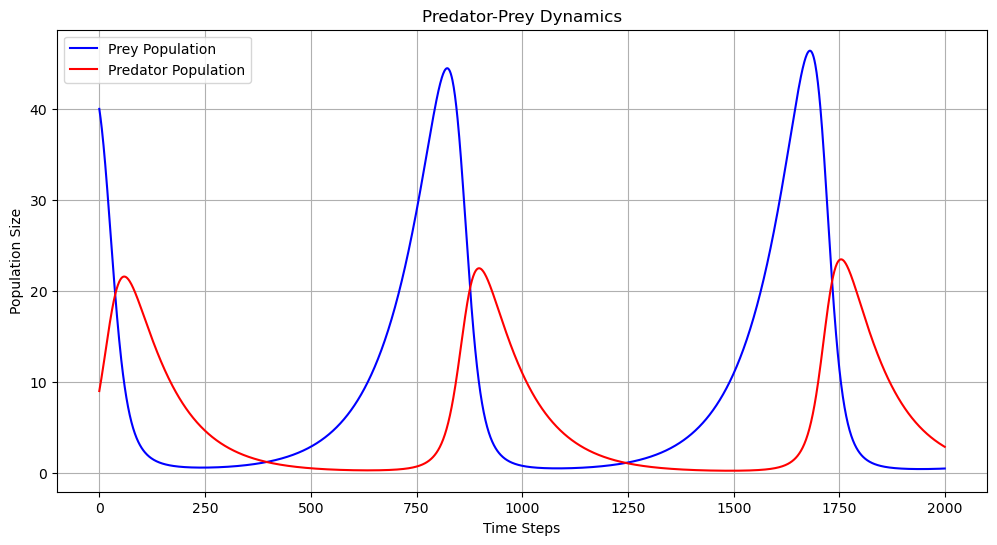

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
alpha = 0.1  # Prey growth rate
beta = 0.02  # Predation rate
delta = 0.01  # Predator growth rate
gamma = 0.1   # Predator death rate

# Time settings
time_steps = 200
dt = 0.1

# Initial populations
prey_population = 40   # Initial prey population (e.g., fish)
predator_population = 9 # Initial predator population (e.g., bears)

# Arrays to hold population data
prey_data = []
predator_data = []

# Simulation loop
for _ in range(int(time_steps/dt)):
    prey_data.append(prey_population)
    predator_data.append(predator_population)
    
    # Lotka-Volterra equations
    d_prey = (alpha * prey_population - beta * prey_population * predator_population) * dt
    d_predator = (delta * prey_population * predator_population - gamma * predator_population) * dt
    
    prey_population += d_prey
    predator_population += d_predator

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(prey_data, label='Prey Population', color='blue')
plt.plot(predator_data, label='Predator Population', color='red')
plt.title('Predator-Prey Dynamics')
plt.xlabel('Time Steps')
plt.ylabel('Population Size')
plt.legend()
plt.grid()
plt.show()


#### Expected Results:
- The population graph over time shows a **typical oscillatory dynamic**, with:
  - Prey populations increasing when predators are scarce,
  - Then decreasing as predators become more numerous,
  - Followed by a new increase in predator numbers as prey become abundant.
- The phase diagram shows the trajectory of prey and predator populations in phase space, typically a **closed loop trajectory**.

#### Customization:
- You can adjust the model parameters (such as \( \alpha \), \( \beta \), \( \gamma \), \( \delta \)) to observe how this affects the population dynamics. For example, by modifying \( \alpha \), you can influence the speed at which prey reproduce, or by adjusting \( \beta \), you can change the intensity of predation.

# Plankton Dynamics

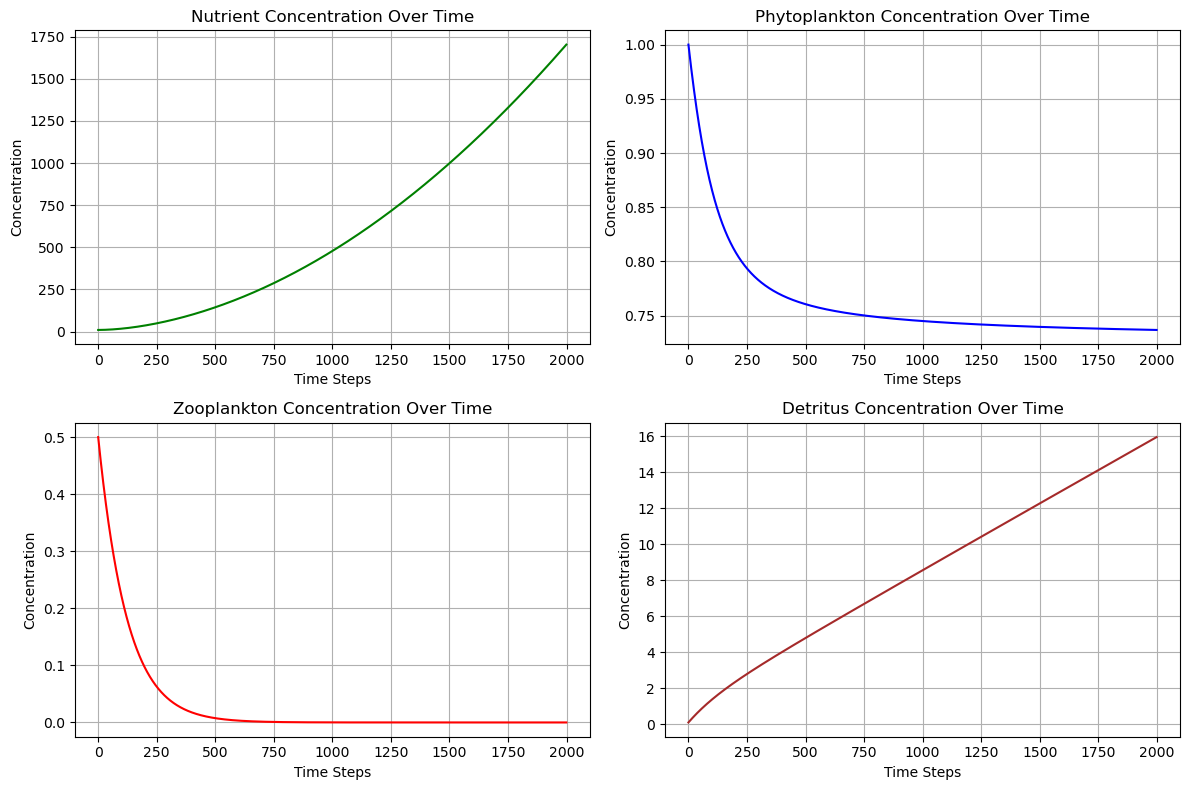

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the NPZD model
N = 10.0    # Initial nutrient concentration
P = 1.0     # Initial phytoplankton concentration
Z = 0.5     # Initial zooplankton concentration
D = 0.1     # Initial detritus concentration

# Model parameters
alpha = 0.1  # Phytoplankton growth rate
beta = 0.02  # Zooplankton grazing rate
mP = 0.1     # Mortality rate of phytoplankton
mZ = 0.1     # Mortality rate of zooplankton
kN = 1.0     # Nutrient regeneration rate from detritus

# Time settings
time_steps = 200
dt = 0.1

# Arrays to hold population data
N_data = []
P_data = []
Z_data = []
D_data = []

# Simulation loop
for _ in range(int(time_steps/dt)):
    N_data.append(N)
    P_data.append(P)
    Z_data.append(Z)
    D_data.append(D)

    # NPZD model equations
    dN = -alpha * P * N / (kN + N) + mP * P + kN * D
    dP = alpha * P * N / (kN + N) - beta * Z * P - mP * P
    dZ = beta * Z * P - mZ * Z
    dD = mP * P + mZ * Z

    # Update populations
    N += dN * dt
    P += dP * dt
    Z += dZ * dt
    D += dD * dt

# Convert lists to numpy arrays for easier manipulation
N_data = np.array(N_data)
P_data = np.array(P_data)
Z_data = np.array(Z_data)
D_data = np.array(D_data)

# Plotting the results
plt.figure(figsize=(12, 8))

# Plot nutrient, phytoplankton, zooplankton, and detritus over time
plt.subplot(2, 2, 1)
plt.plot(N_data, label='Nutrients', color='green')
plt.title('Nutrient Concentration Over Time')
plt.xlabel('Time Steps')
plt.ylabel('Concentration')
plt.grid()

plt.subplot(2, 2, 2)
plt.plot(P_data, label='Phytoplankton', color='blue')
plt.title('Phytoplankton Concentration Over Time')
plt.xlabel('Time Steps')
plt.ylabel('Concentration')
plt.grid()

plt.subplot(2, 2, 3)
plt.plot(Z_data, label='Zooplankton', color='red')
plt.title('Zooplankton Concentration Over Time')
plt.xlabel('Time Steps')
plt.ylabel('Concentration')
plt.grid()

plt.subplot(2, 2, 4)
plt.plot(D_data, label='Detritus', color='brown')
plt.title('Detritus Concentration Over Time')
plt.xlabel('Time Steps')
plt.ylabel('Concentration')
plt.grid()

# Show all plots
plt.tight_layout()
plt.show()


# Interpretation of the NPZD Modeling Code

This code simulates and visualizes the evolution of the concentrations of four components in an NPZD (Nutrients, Phytoplankton, Zooplankton, and Detritus) model over time, using a system of differential equations. Below is a detailed explanation of how the code works.

## 1. Initialization of Variables and Parameters

### Initial Variables:
- **N**: Initial concentration of nutrients (value = 10.0).
- **P**: Initial concentration of phytoplankton (value = 1.0).
- **Z**: Initial concentration of zooplankton (value = 0.5).
- **D**: Initial concentration of detritus (value = 0.1).

### NPZD Model Parameters:
- **alpha (0.1)**: Phytoplankton growth rate.
- **beta (0.02)**: Rate at which zooplankton consume phytoplankton (grazing).
- **mP (0.1)**: Phytoplankton mortality rate.
- **mZ (0.1)**: Zooplankton mortality rate.
- **kN (1.0)**: Nutrient regeneration rate from detritus.

### Temporal Parameters:
- **time_steps (200)**: Total number of time steps in the simulation.
- **dt (0.1)**: Time step size (interval between each iteration).

---

## 2. Simulation Loop

The main loop (`for _ in range(int(time_steps/dt))`) performs the calculations at each time step to update the concentrations of nutrients (N), phytoplankton (P), zooplankton (Z), and detritus (D).

### At each iteration of the loop:
- The current values of **N**, **P**, **Z**, and **D** are added to the lists `N_data`, `P_data`, `Z_data`, and `D_data`, respectively, to keep track of the evolution of the concentrations.
- The NPZD model equations are then solved step by step to compute the derivatives of the variables:
  - **dN**: Rate of change of nutrients, considering consumption by phytoplankton and regeneration from detritus.
  - **dP**: Rate of change of phytoplankton, considering growth, grazing by zooplankton, and mortality.
  - **dZ**: Rate of change of zooplankton, considering growth due to consumption of phytoplankton and mortality.
  - **dD**: Rate of change of detritus, produced from the mortality of phytoplankton and zooplankton.
- The concentrations of **N**, **P**, **Z**, and **D** are updated at each step (`N += dN * dt`, etc.).

---

## 3. Conversion to NumPy Arrays

Once the simulation is completed, the lists `N_data`, `P_data`, `Z_data`, and `D_data` are converted to NumPy arrays for easier manipulation and use in the plots.

---

## 4. Visualization of Results

The results of the simulation are plotted on four subplots, each representing the evolution of one of the components (Nutrients, Phytoplankton, Zooplankton, and Detritus) over time. This allows visualization of the dynamic interactions between the different components of the model.

### Subplots:
- **Subplot 1 (Nutrients)**: Shows the evolution of nutrient concentration (N) over time.
- **Subplot 2 (Phytoplankton)**: Shows the evolution of phytoplankton concentration (P) over time.
- **Subplot 3 (Zooplankton)**: Shows the evolution of zooplankton concentration (Z) over time.
- **Subplot 4 (Detritus)**: Shows the evolution of detritus concentration (D) over time.

Each plot is configured with a title, labeled axes, and a grid for easier reading of the results.

Finally, `plt.tight_layout()` is called to ensure that the subplots do not overlap, and `plt.show()` displays the plots.

---

## 5. Summary of NPZD Model Equations

The NPZD model equations describe the interactions between nutrients, phytoplankton, zooplankton, and detritus:

- **Nutrients (N)**: Consumed by phytoplankton and regenerated from detritus.
- **Phytoplankton (P)**: Grows depending on nutrient availability and is consumed by zooplankton. It also dies at a constant rate.
- **Zooplankton (Z)**: Feeds on phytoplankton and also dies at a constant rate.
- **Detritus (D)**: Comes from the decomposition of dead phytoplankton and zooplankton.

The model parameters regulate the growth, consumption, and degradation rates of each component.

---

## 6. Expected Behavior

- **Nutrients**: Should decrease as they are consumed by phytoplankton, but this decrease will be offset by regeneration from detritus.
- **Phytoplankton**: Should grow with nutrient availability, but their population will be limited by zooplankton grazing and their own mortality.
- **Zooplankton**: Should grow based on the amount of available phytoplankton, but their population will be regulated by their mortality rate.
- **Detritus**: Will increase as phytoplankton and zooplankton die, then decrease based on the nutrient regeneration rate.

This model is a simple example of population dynamics in a marine ecosystem where nutrients and different classes of organisms interact in a complex way.

